In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("data.xlsx")
df.dropna(subset=['Credit_Score'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [3]:
x_columns = df.columns.tolist()
x_columns.remove('Credit_Score')
X = df[x_columns]
y = df['Credit_Score']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.preprocessing import LabelEncoder

class Data_Transformer(object):
    
    def fit(self, X, y=None):
        self.mean_age = X["Age"].mean()
        self.occu_le = LabelEncoder() # create label-encoder
        encoded_occupation = pd.Series(self.occu_le.fit_transform(X["Occupation"])) # fit and transform occupation with label-encoder
        self.majority_occupation = encoded_occupation.mode()[0] # obtain majority occupation code
        self.mean_annual_income = X["Annual_Income"].mean()
        self.mean_monthly_inhand_salary = X["Monthly_Inhand_Salary"].mean()
        self.mean_num_bank_accounts = X["Num_Bank_Accounts"].mean()
        self.mean_num_creadit_card = X["Num_Credit_Card"].mean()
        self.mean_num_interest_rate = X['Interest_Rate'].mean()
        self.mean_num_of_loan = X['Num_of_Loan'].mean()
        self.mean_delay_from_due_date = X['Delay_from_due_date'].mean()
        self.mean_num_of_delayed_payment = X['Num_of_Delayed_Payment'].mean()
        self.mean_changed_credit_limit = X['Changed_Credit_Limit'].mean()
        self.mean_num_credit_inquiries = X['Num_Credit_Inquiries'].mean()
        self.cm_le = LabelEncoder() # create label-encoder
        encoded_credit_mix = pd.Series(self.cm_le.fit_transform(X["Credit_Mix"])) # fit and transform credit mix with label-encoder
        self.majority_credit_mix = encoded_credit_mix.mode()[0] # obtain majority credit mix code
        self.mean_outstanding_debt = X['Outstanding_Debt'].mean()
        self.mean_credit_history_age = X['Credit_History_Age'].mean()
        self.pma_le = LabelEncoder() # create label-encoder
        encoded_payment_of_min_amount = pd.Series(self.pma_le.fit_transform(X["Payment_of_Min_Amount"])) # fit and transform payment of min amount with label-encoder
        self.majority_payment_of_min_amount = encoded_payment_of_min_amount.mode()[0] # obtain majority payment of min amount
        self.mean_total_EMI_per_month = X['Total_EMI_per_month'].mean()
        self.mean_amount_invested_monthly = X['Amount_invested_monthly'].mean()
        self.pb_le = LabelEncoder() # create label-encoder
        encoded_payment_behaviour = pd.Series(self.pb_le.fit_transform(X["Payment_Behaviour"])) # fit and transform payment behaviour with label-encoder
        self.majority_payment_behaviour = encoded_payment_behaviour.mode()[0] # obtain majority payment behaviour
        self.mean_monthly_balance = X['Monthly_Balance'].mean()
        
    def transform(self, X, y=None):
        new_df = pd.DataFrame()
        new_df["Age"] = X["Age"]
        new_df["Age"].fillna(self.mean_age,inplace=True)
        new_df["Occupation"] = self.occu_le.transform(X["Occupation"])
        new_df["Occupation"].fillna(self.majority_occupation,inplace=True)
        new_df["Annual_Income"] = X["Annual_Income"]
        new_df["Annual_Income"].fillna(self.mean_annual_income,inplace=True)
        new_df["Monthly_Inhand_Salary"] = X["Monthly_Inhand_Salary"]
        new_df["Monthly_Inhand_Salary"].fillna(self.mean_monthly_inhand_salary,inplace=True)
        new_df["Num_Bank_Accounts"] = X["Num_Bank_Accounts"]
        new_df["Num_Bank_Accounts"].fillna(self.mean_num_bank_accounts,inplace=True)
        new_df["Num_Credit_Card"] = X["Num_Credit_Card"]
        new_df["Num_Credit_Card"].fillna(self.mean_num_creadit_card,inplace=True)
        new_df["Interest_Rate"] = X["Interest_Rate"]
        new_df["Interest_Rate"].fillna(self.mean_num_interest_rate,inplace=True)
        new_df["Num_of_Loan"] = X["Num_of_Loan"]
        new_df["Num_of_Loan"].fillna(self.mean_num_of_loan,inplace=True)
        new_df["Delay_from_due_date"] = X["Delay_from_due_date"]
        new_df["Delay_from_due_date"].fillna(self.mean_delay_from_due_date,inplace=True)
        new_df["Num_of_Delayed_Payment"] = X["Num_of_Delayed_Payment"]
        new_df["Num_of_Delayed_Payment"].fillna(self.mean_num_of_delayed_payment,inplace=True)
        new_df["Changed_Credit_Limit"] = X["Changed_Credit_Limit"]
        new_df["Changed_Credit_Limit"].fillna(self.mean_changed_credit_limit,inplace=True)
        new_df["Num_Credit_Inquiries"] = X["Num_Credit_Inquiries"]
        new_df["Num_Credit_Inquiries"].fillna(self.mean_num_credit_inquiries,inplace=True)
        new_df["Credit_Mix"] = self.cm_le.transform(X["Credit_Mix"])
        new_df["Credit_Mix"].fillna(self.majority_credit_mix,inplace=True)
        new_df["Outstanding_Debt"] = X["Outstanding_Debt"]
        new_df["Outstanding_Debt"].fillna(self.mean_outstanding_debt,inplace=True)
        new_df["Credit_History_Age"] = X["Credit_History_Age"]
        new_df["Credit_History_Age"].fillna(self.mean_credit_history_age,inplace=True)
        new_df["Payment_of_Min_Amount"] = self.pma_le.transform(X["Payment_of_Min_Amount"])
        new_df["Payment_of_Min_Amount"].fillna(self.majority_payment_of_min_amount,inplace=True)
        new_df["Total_EMI_per_month"] = X["Total_EMI_per_month"]
        new_df["Total_EMI_per_month"].fillna(self.mean_total_EMI_per_month,inplace=True)
        new_df["Amount_invested_monthly"] = X["Amount_invested_monthly"]
        new_df["Amount_invested_monthly"].fillna(self.mean_amount_invested_monthly,inplace=True)
        new_df["Payment_Behaviour"] = self.pb_le.transform(X["Payment_Behaviour"])
        new_df["Payment_Behaviour"].fillna(self.majority_payment_behaviour,inplace=True)
        new_df["Monthly_Balance"] = X["Monthly_Balance"]
        new_df["Monthly_Balance"].fillna(self.mean_monthly_balance,inplace=True)
        return new_df
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score, classification_report, confusion_matrix

In [7]:
steps = [('dtf', Data_Transformer()),
        ('rfc', RandomForestClassifier(n_jobs=-1))]
model = Pipeline(steps)
param_grid = {'rfc__max_depth': [2, 5, 10, 20, 30, 50, 70, 100, 130, 170, 210], 
              'rfc__min_samples_leaf': [1, 2, 3, 4, 5, 7, 10, 13, 17, 21, 26, 31]}
model_gsv = GridSearchCV(model, param_grid, cv=2, scoring=make_scorer(recall_score, average='macro', greater_is_better=True))

In [8]:
model_gsv.fit(X_train, y_train)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('dtf',
                                        <__main__.Data_Transformer object at 0x000001B01B87B040>),
                                       ('rfc',
                                        RandomForestClassifier(n_jobs=-1))]),
             param_grid={'rfc__max_depth': [2, 5, 10, 20, 30, 50, 70, 100, 130,
                                            170, 210],
                         'rfc__min_samples_leaf': [1, 2, 3, 4, 5, 7, 10, 13, 17,
                                                   21, 26, 31]},
             scoring=make_scorer(recall_score, average=macro))

In [9]:
model_gsv.best_params_

{'rfc__max_depth': 5, 'rfc__min_samples_leaf': 7}

In [10]:
result = model_gsv.cv_results_
result = pd.DataFrame(result)[['param_rfc__max_depth', 'param_rfc__min_samples_leaf',  'mean_test_score', 'rank_test_score']]
result

param_rfc__max_depth param_rfc__min_samples_leaf  mean_test_score  \
0                      2                           1         0.593441   
1                      2                           2         0.567994   
2                      2                           3         0.564071   
3                      2                           4         0.587632   
4                      2                           5         0.589392   
..                   ...                         ...              ...   
127                  210                          13         0.770735   
128                  210                          17         0.771701   
129                  210                          21         0.775913   
130                  210                          26         0.772101   
131                  210                          31         0.774425   

     rank_test_score  
0                123  
1                128  
2                130  
3                127  
4                125  
..               ...  
127               57  
128               52  
129               15  
130               47  
131               27  

[132 rows x 4 columns]

In [11]:
y_test_pred = model_gsv.predict(X_test)

In [12]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.76      0.81      0.78       822
           1       0.88      0.66      0.75      1217
           2       0.59      0.90      0.71       461

    accuracy                           0.75      2500
   macro avg       0.74      0.79      0.75      2500
weighted avg       0.78      0.75      0.76      2500



In [13]:
confusion_matrix(y_test,y_test_pred)

array([[668,  71,  83],
       [210, 802, 205],
       [  4,  42, 415]], dtype=int64)

Text(0, 0.5, 'Feature Importance')

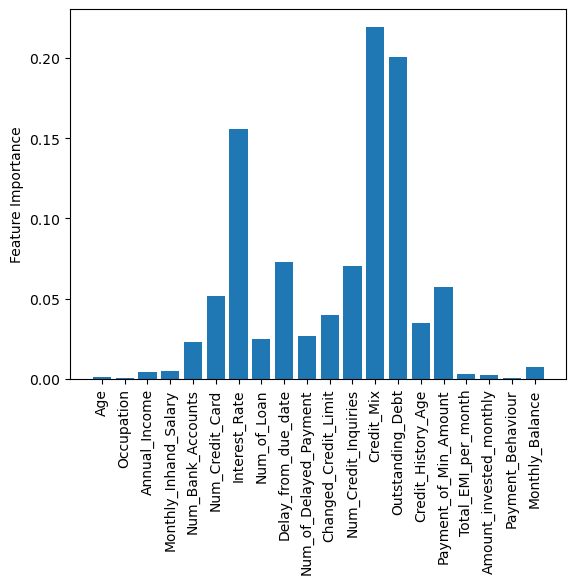

In [14]:
plt.bar(model_gsv.best_estimator_.steps[0][1].transform(X_train).columns, model_gsv.best_estimator_.steps[1][1].feature_importances_)
plt.xticks(rotation=90)
plt.ylabel('Feature Importance')

In [15]:
import shap

model = model_gsv.best_estimator_.steps[1][1]
explainer = shap.TreeExplainer(model)
X_display = model_gsv.best_estimator_.steps[0][1].transform(X_test).iloc[:1000,:]
shap_values = explainer.shap_values(X_display)

c:\ProgramData\anaconda3\lib\site-packages\shap\utils\_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
c:\ProgramData\anaconda3\lib\site-packages\shap\utils\_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def delta_minimization_order(all_masks, max_swap_size=100

In [16]:
len(shap_values)

3

In [17]:
shap_values[0].shape

(1000, 20)

In [18]:
shap_values[1].shape

(1000, 20)

In [19]:
shap_values[2].shape

(1000, 20)

In [20]:
shap.initjs()

In [21]:
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_display.iloc[0,:])

In [22]:
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], X_display.iloc[0,:])

In [23]:
shap.force_plot(explainer.expected_value[2], shap_values[2][0,:], X_display.iloc[0,:])

In [24]:
shap.force_plot(explainer.expected_value[0], shap_values[0], X_display)

In [25]:
shap.force_plot(explainer.expected_value[1], shap_values[1], X_display)

In [26]:
shap.force_plot(explainer.expected_value[2], shap_values[2], X_display)

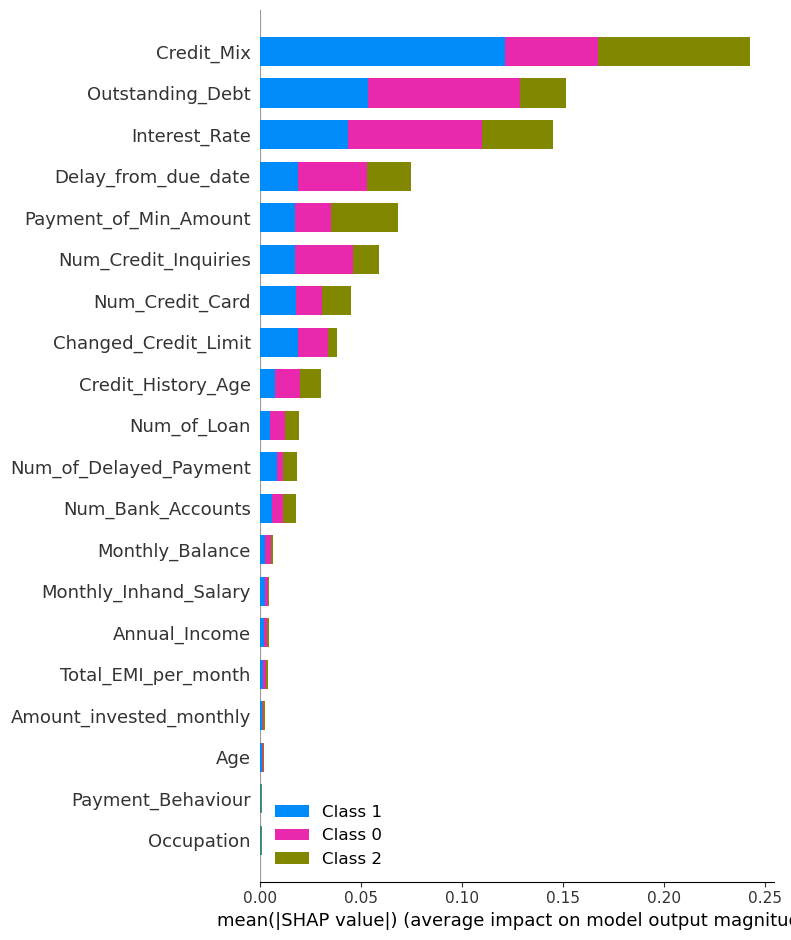

In [27]:
shap.summary_plot(shap_values, X_display)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


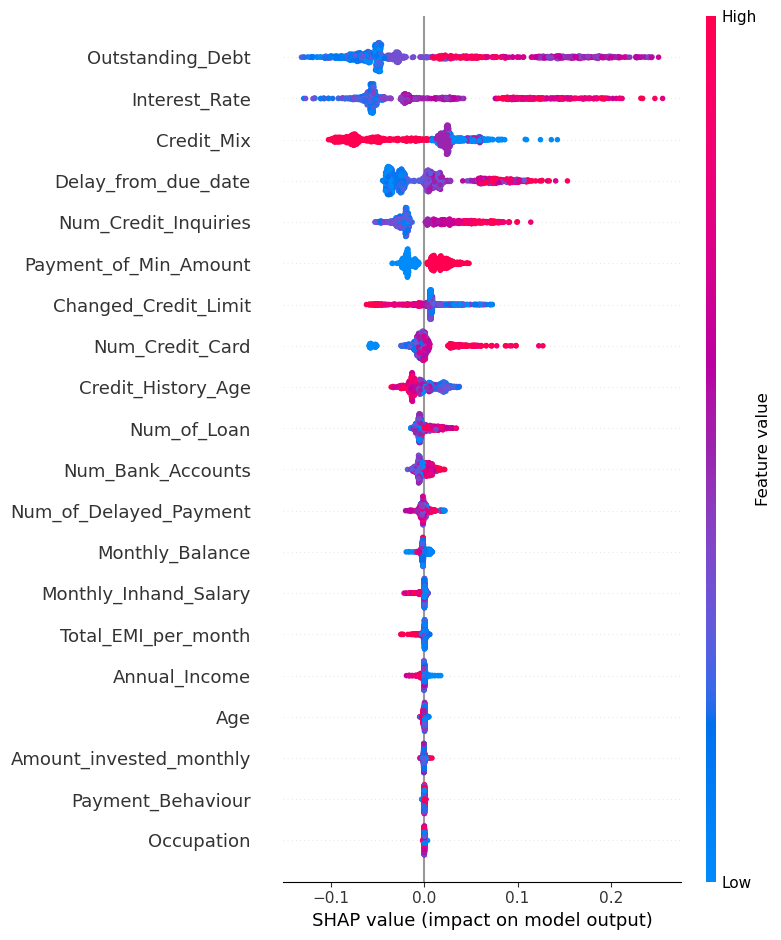

In [28]:
shap.summary_plot(shap_values[0], X_display)

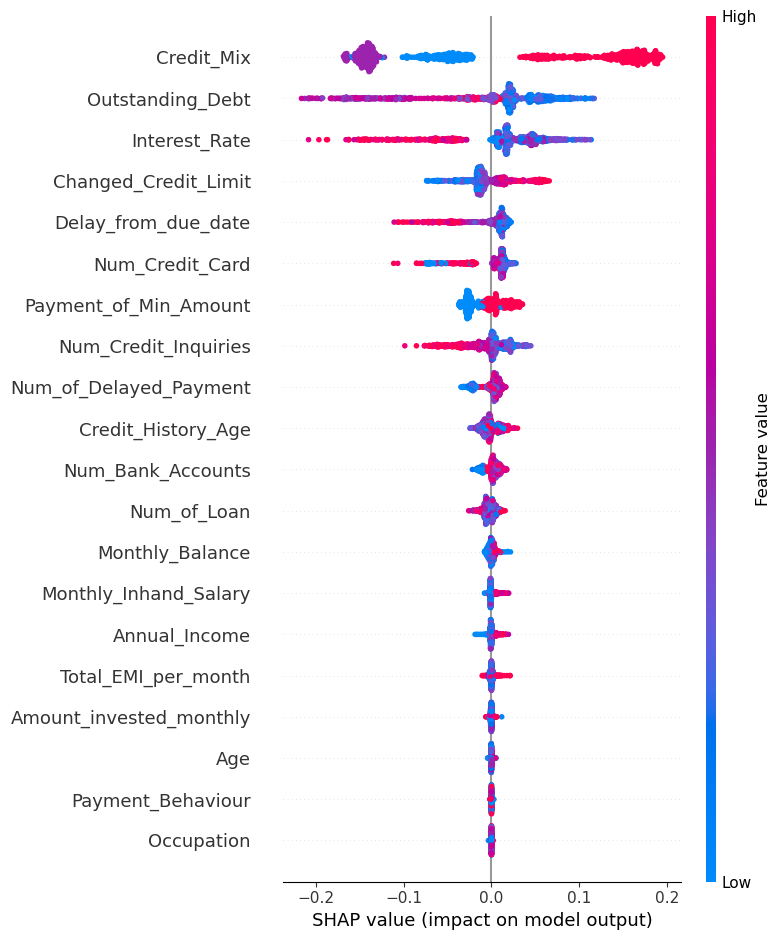

In [29]:
shap.summary_plot(shap_values[1], X_display)

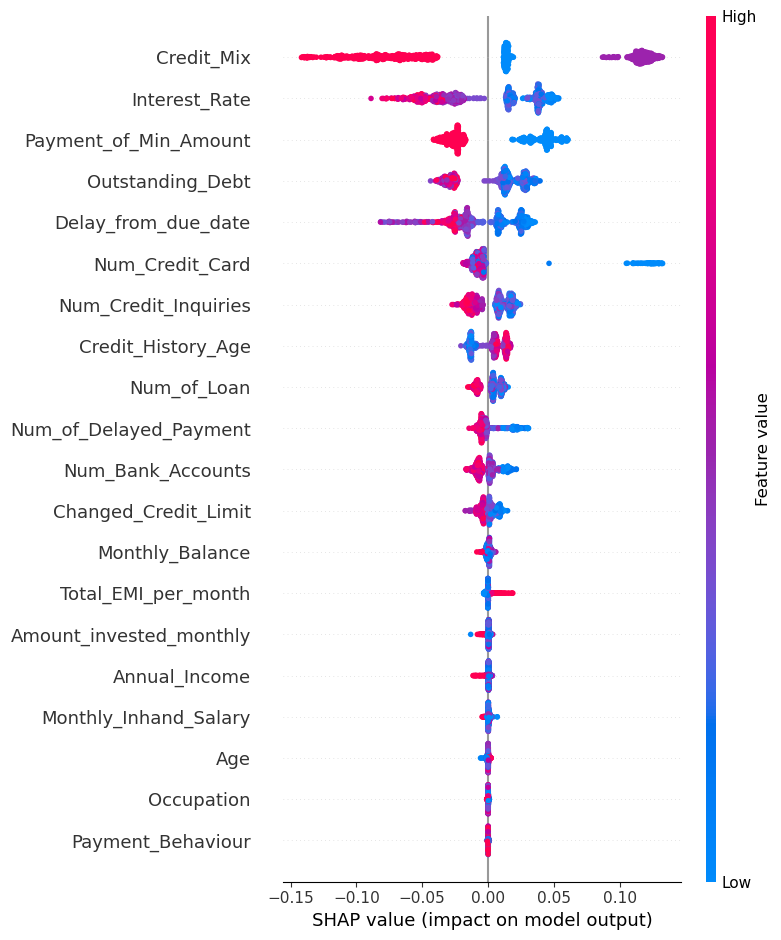

In [30]:
shap.summary_plot(shap_values[2], X_display)

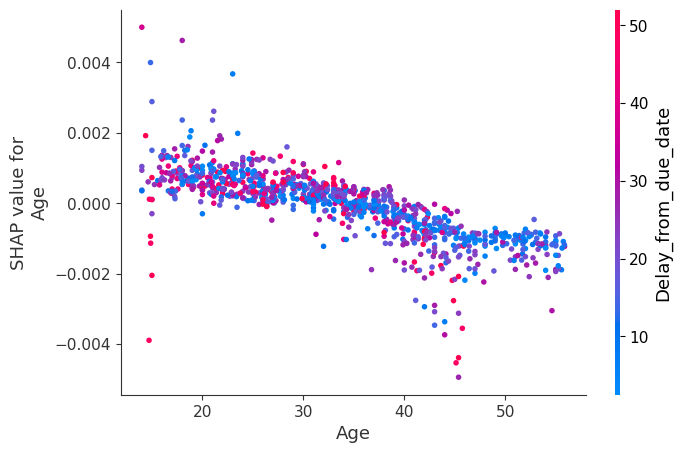

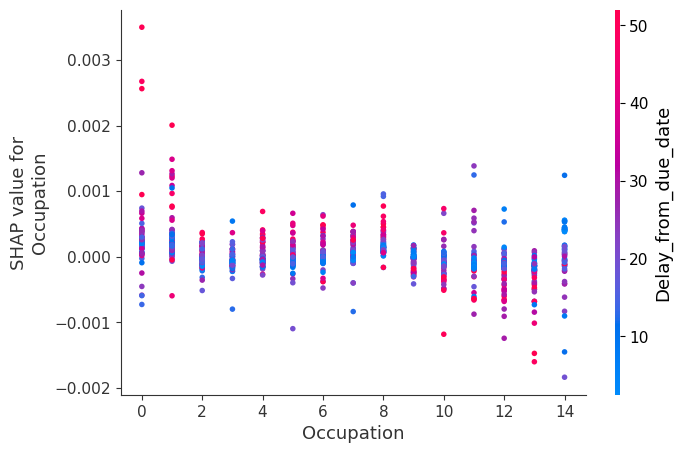

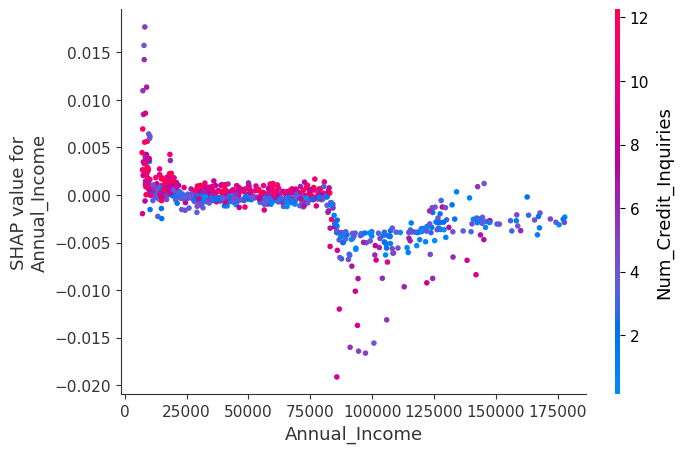

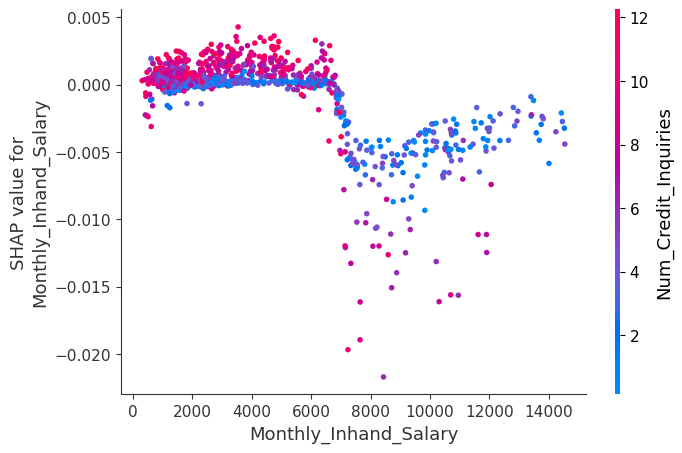

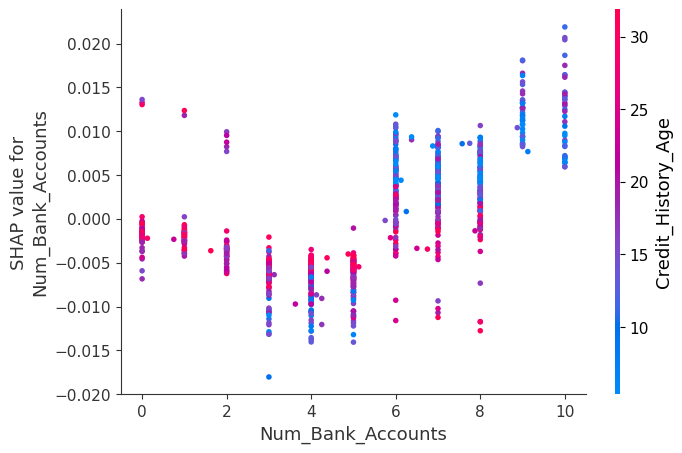

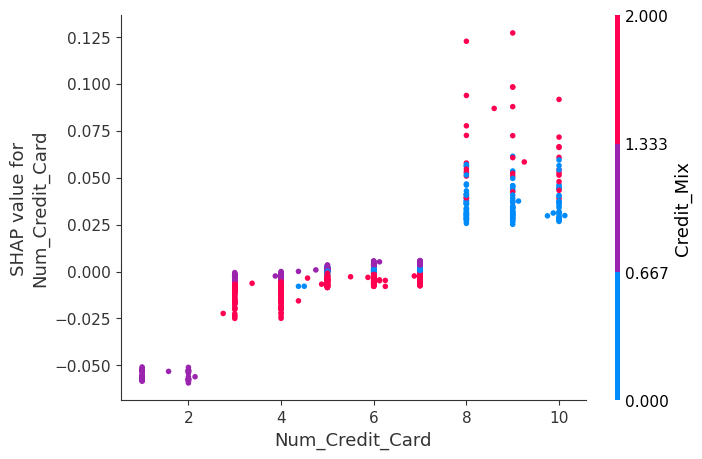

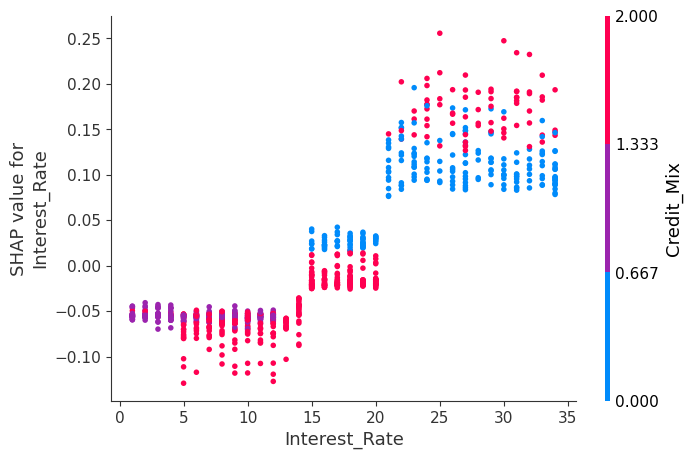

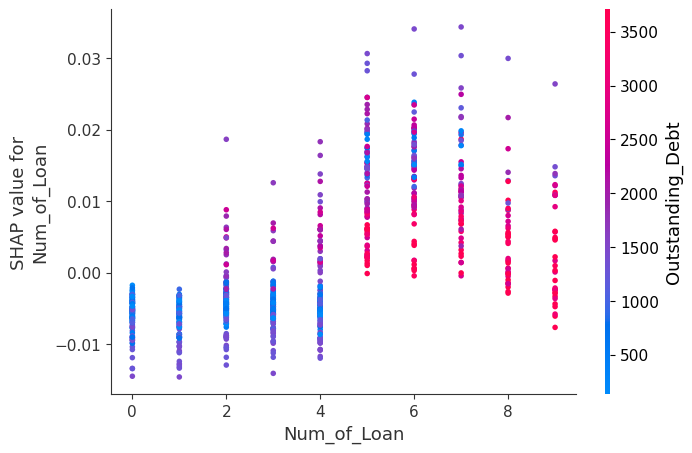

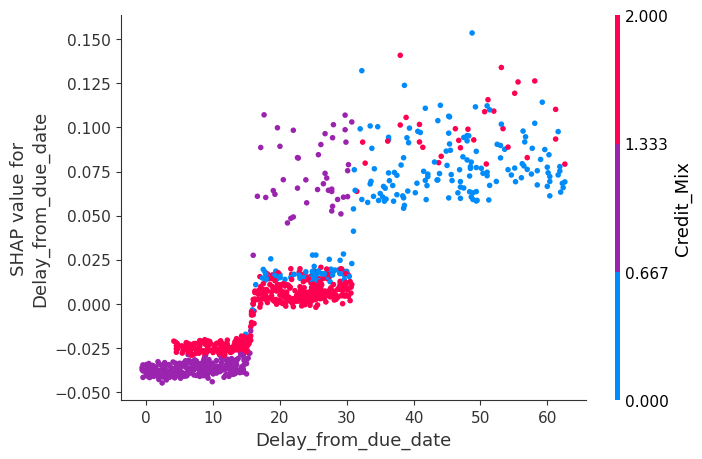

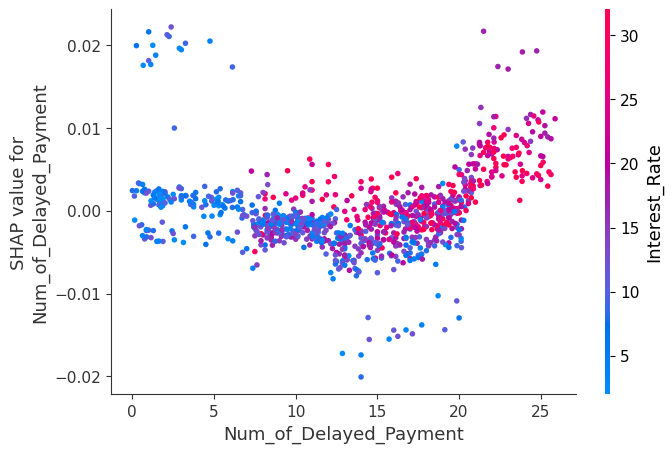

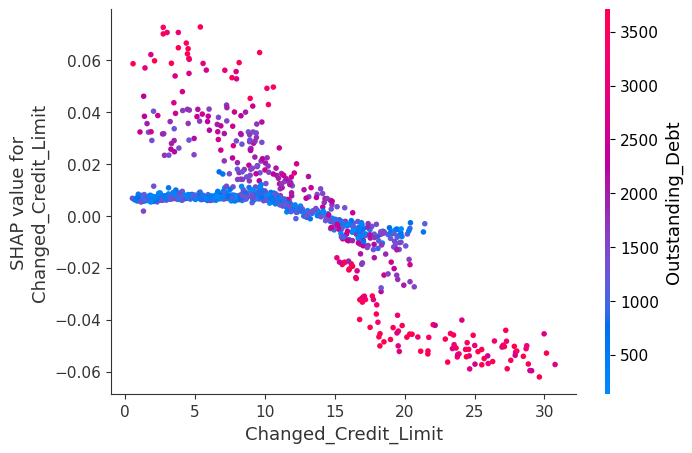

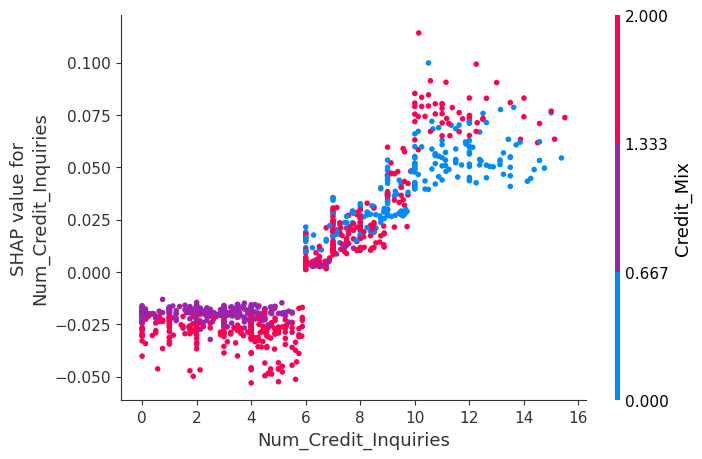

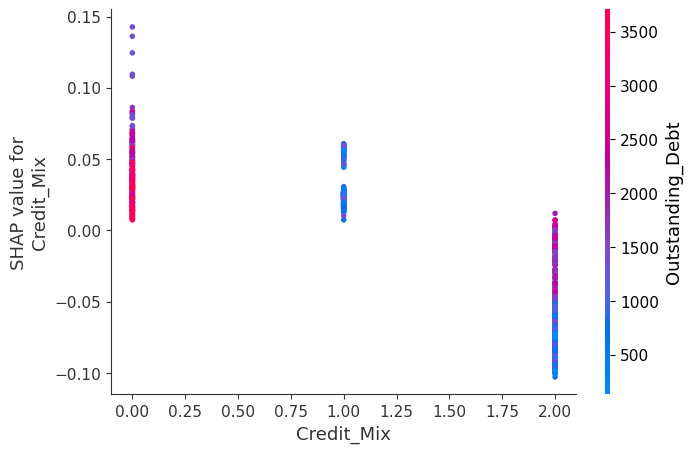

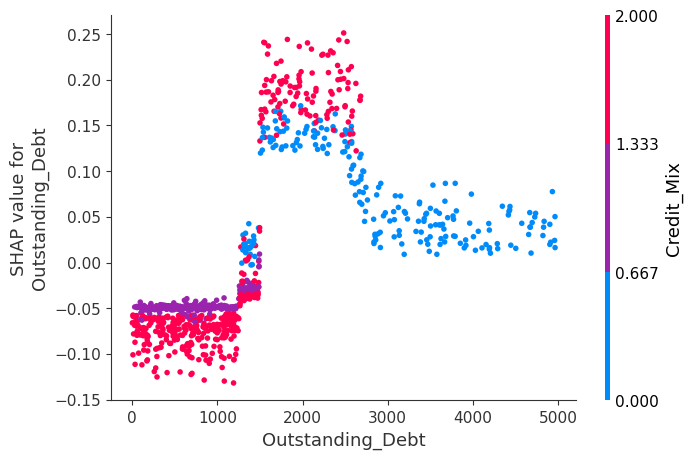

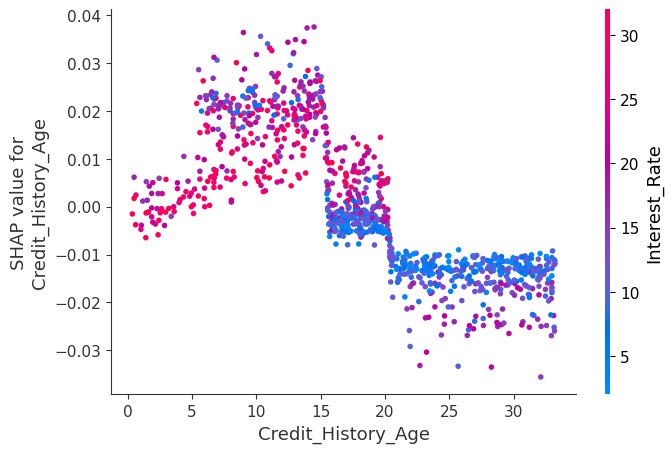

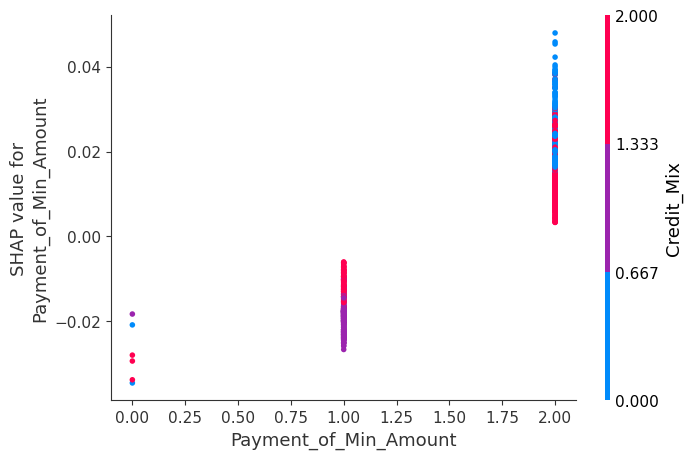

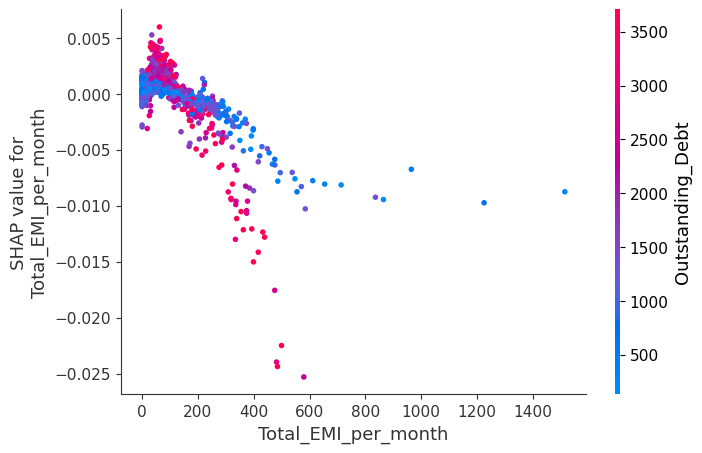

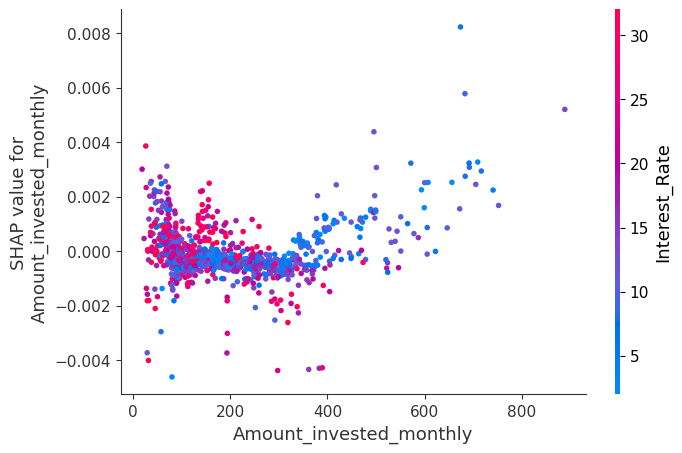

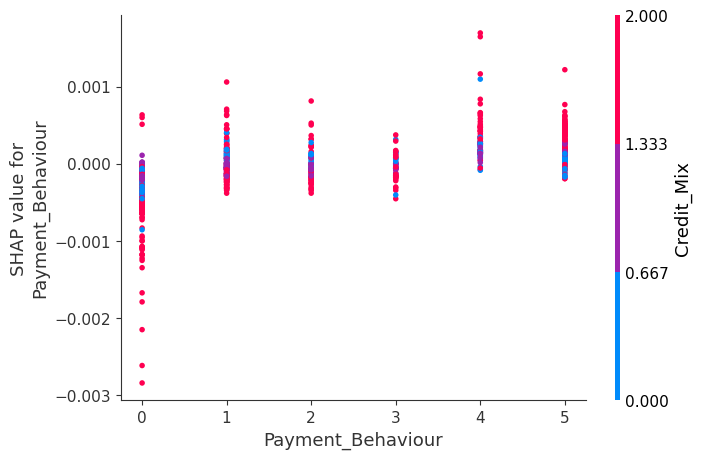

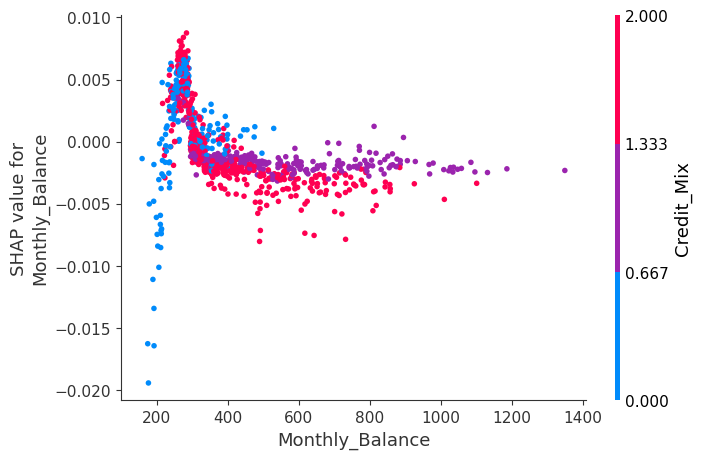

In [31]:
for name in X_display.columns:
    shap.dependence_plot(name, shap_values[0], X_display, display_features=X_display)

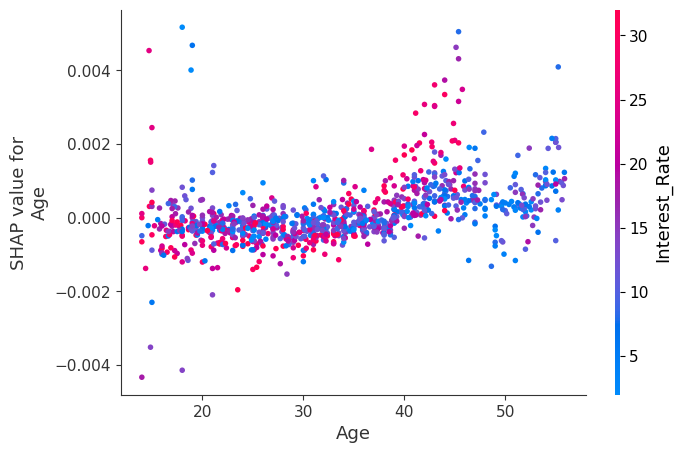

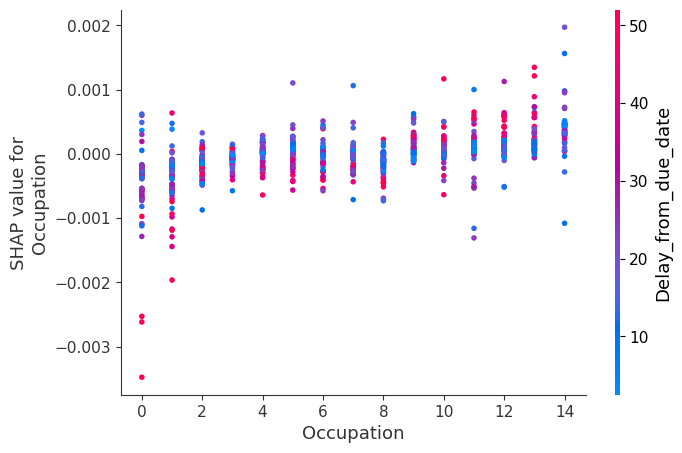

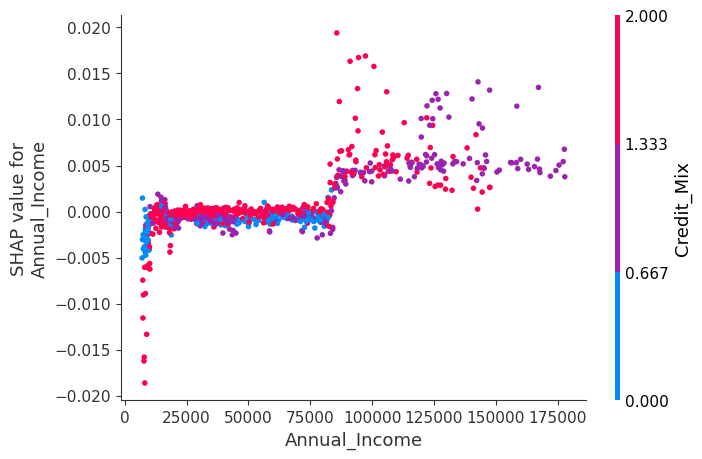

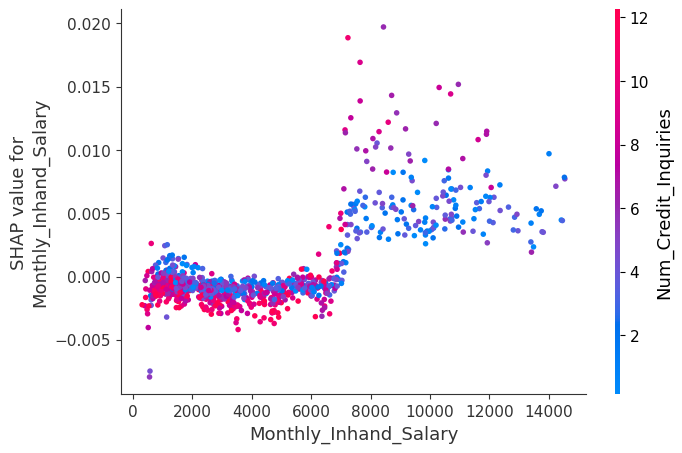

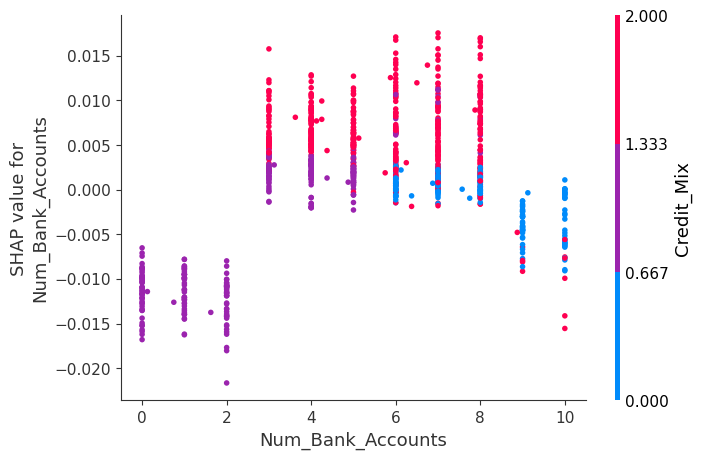

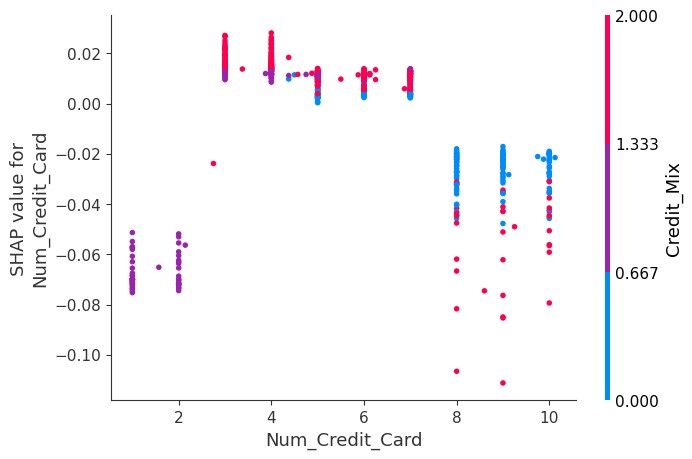

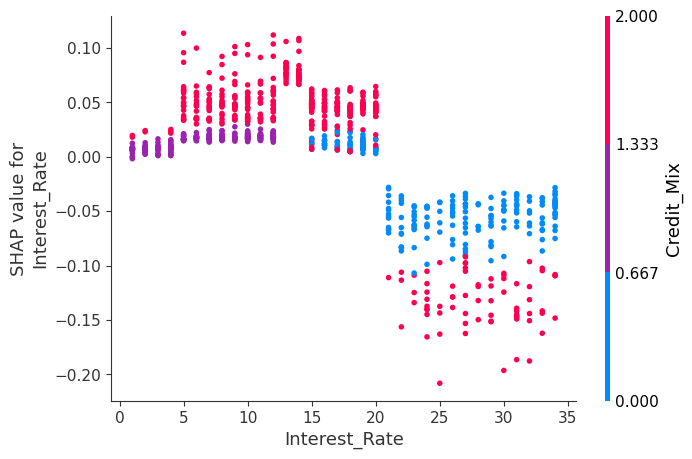

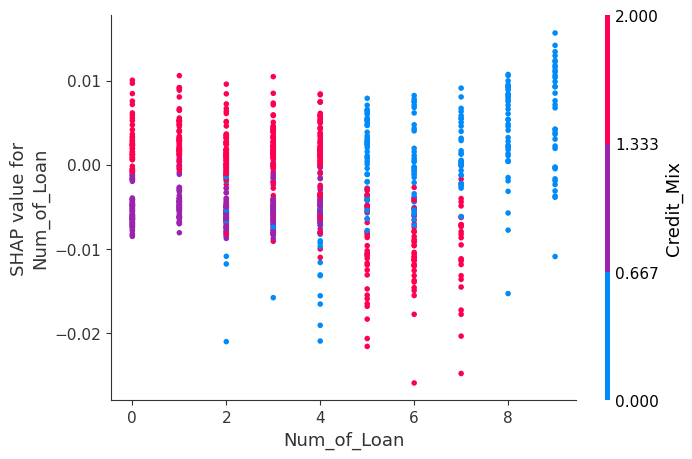

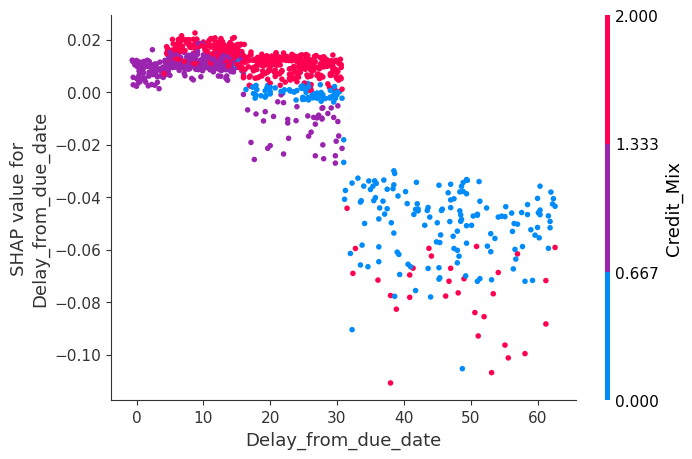

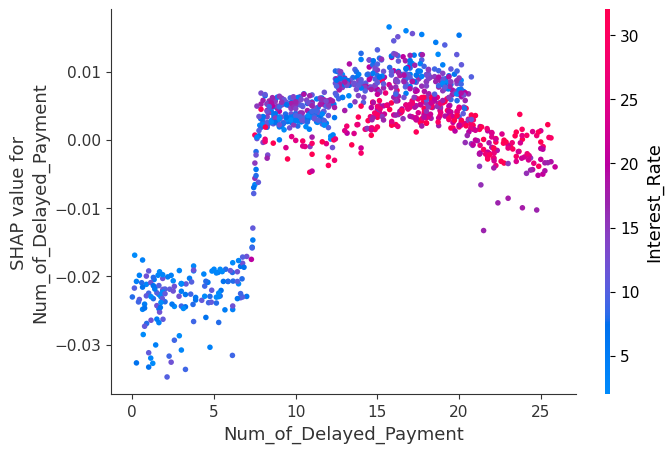

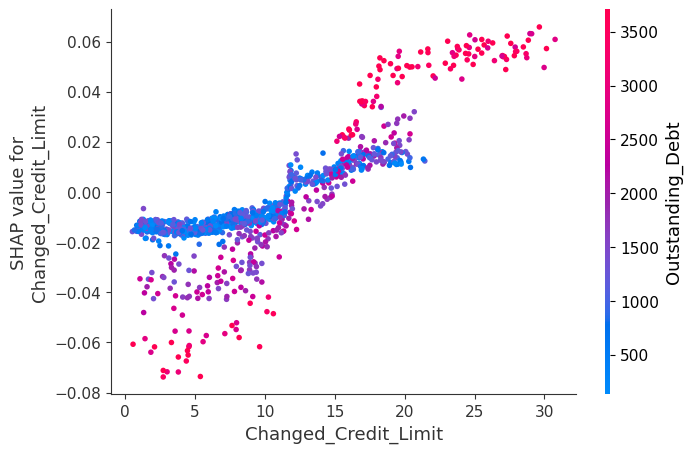

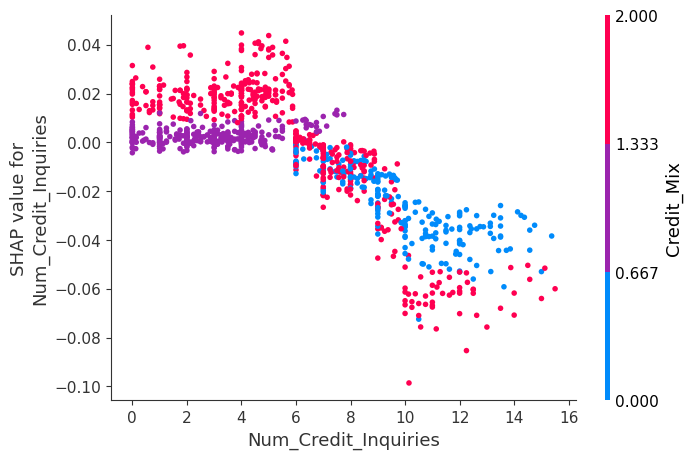

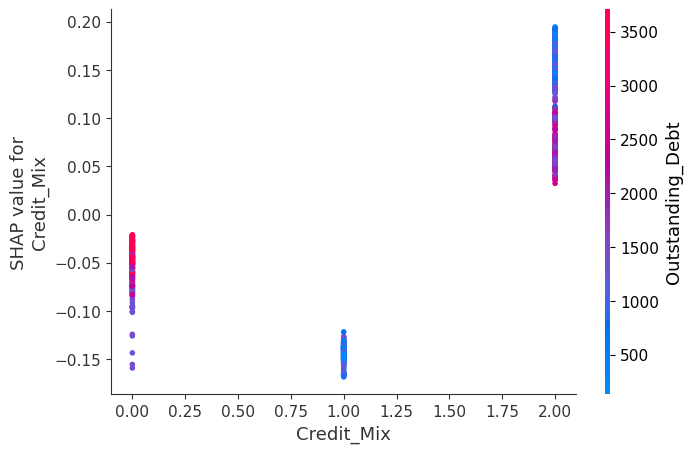

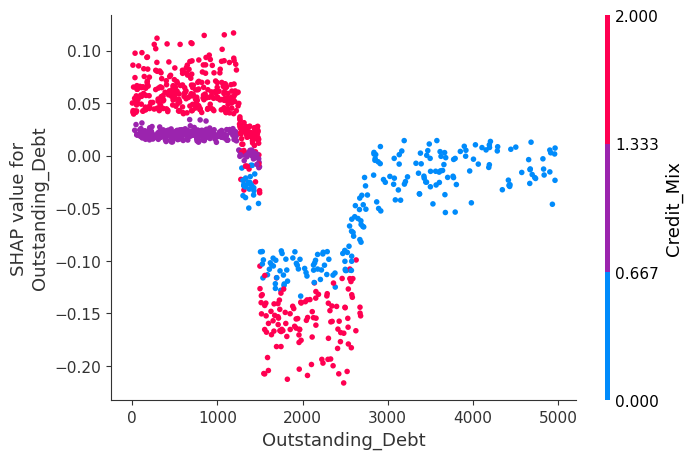

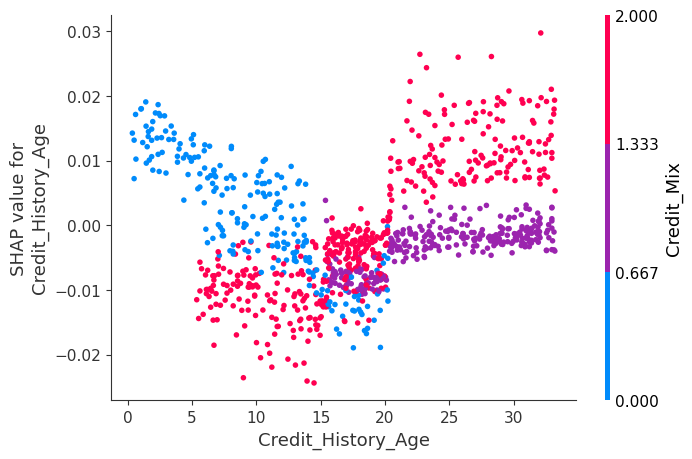

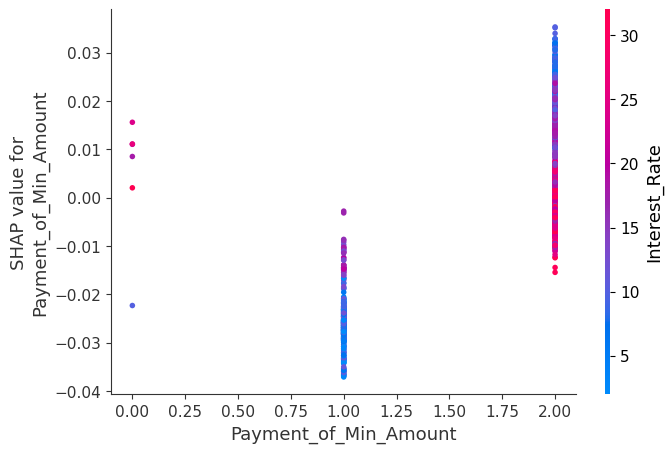

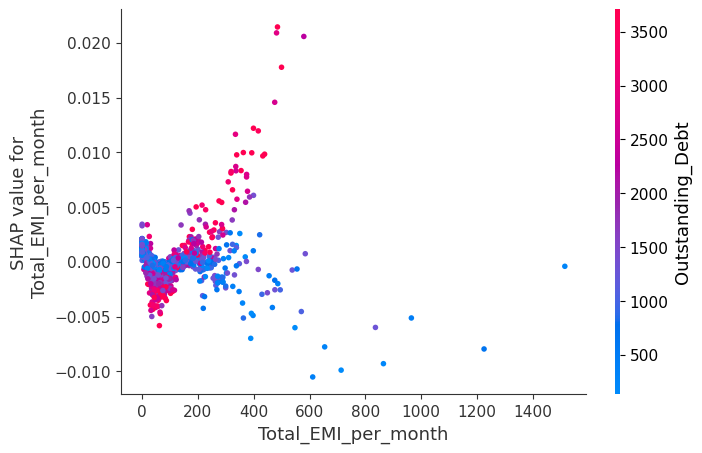

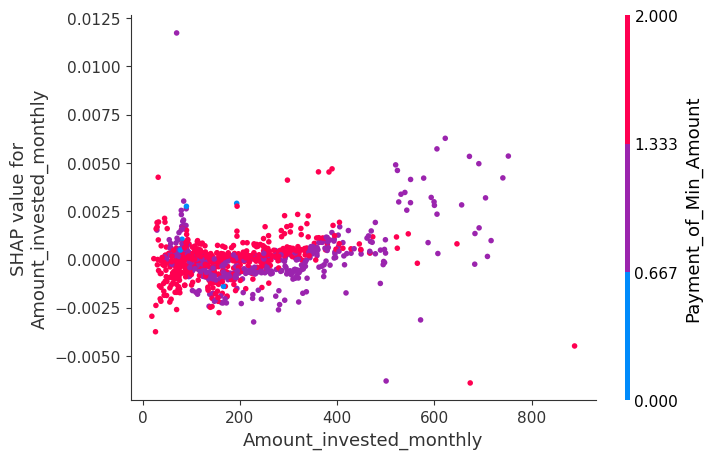

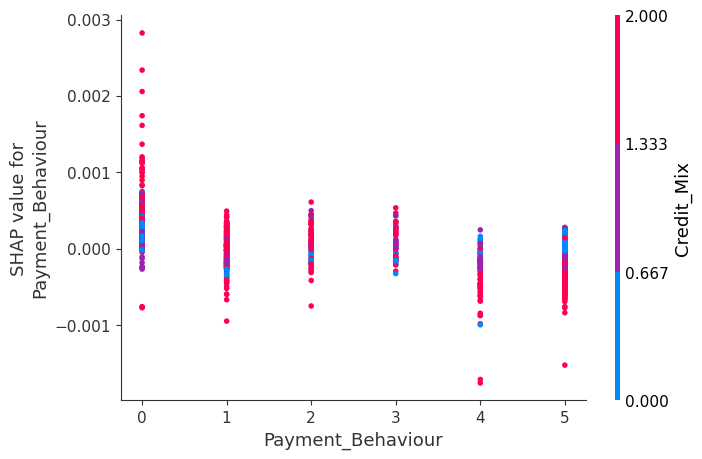

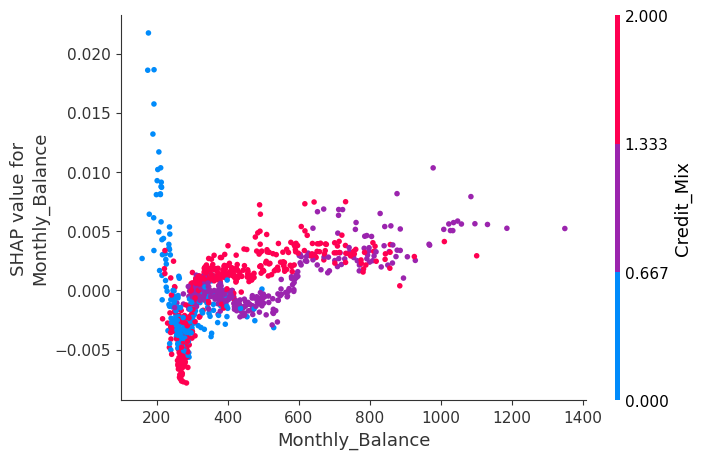

In [32]:
for name in X_display.columns:
    shap.dependence_plot(name, shap_values[1], X_display, display_features=X_display)

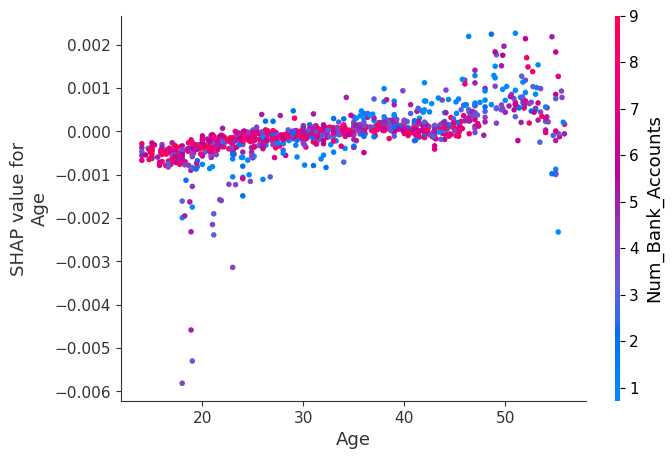

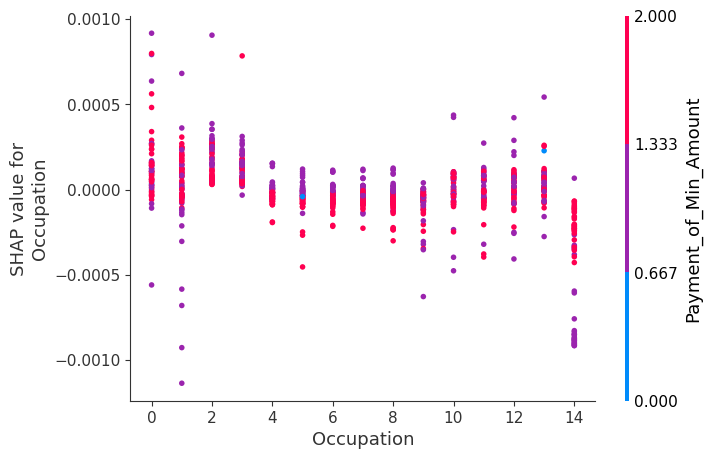

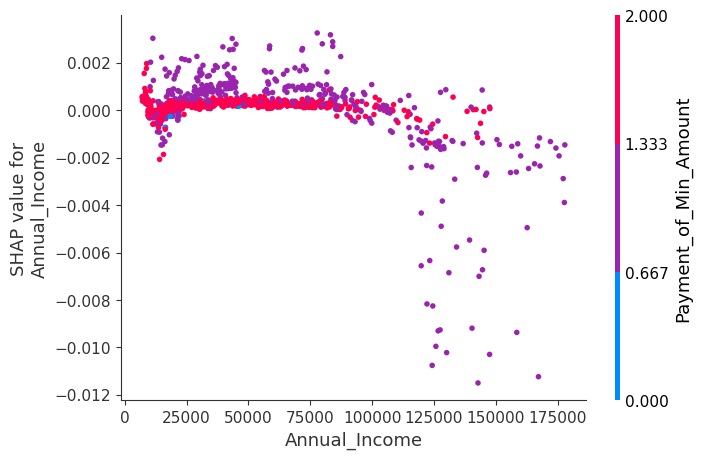

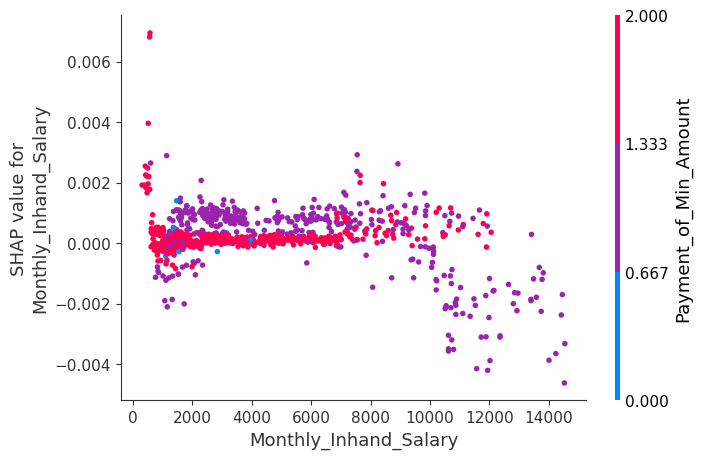

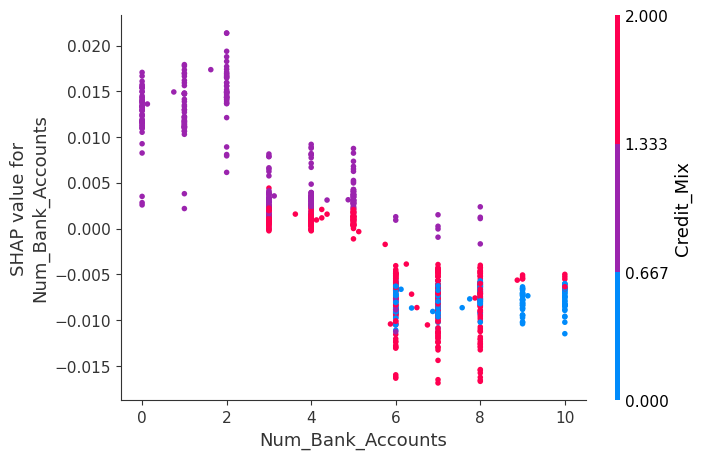

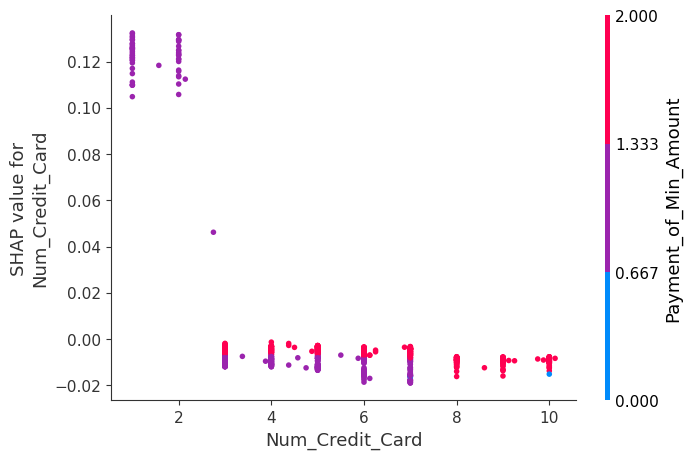

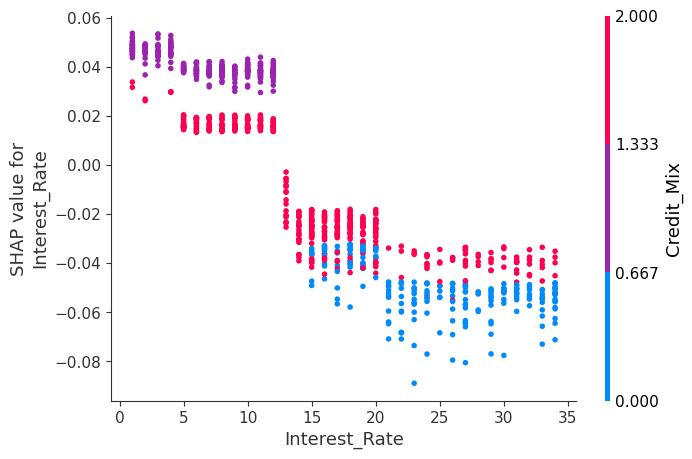

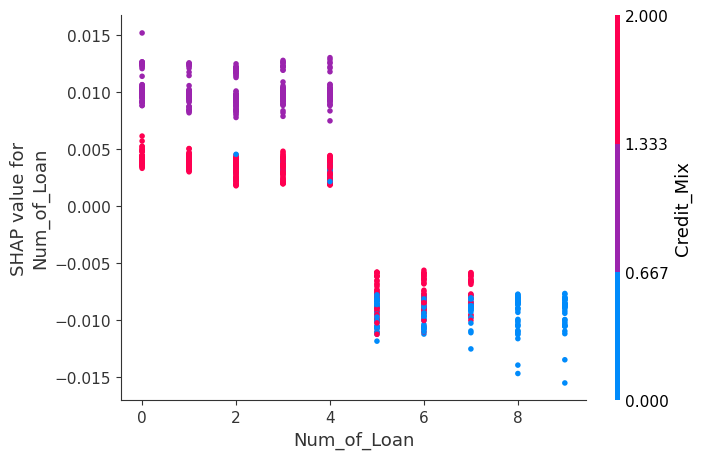

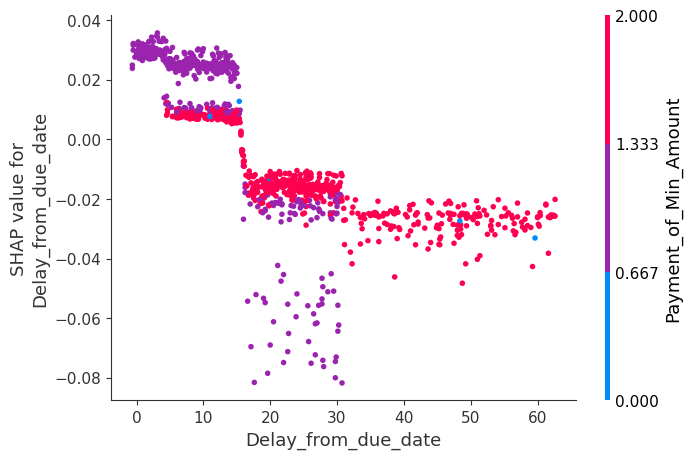

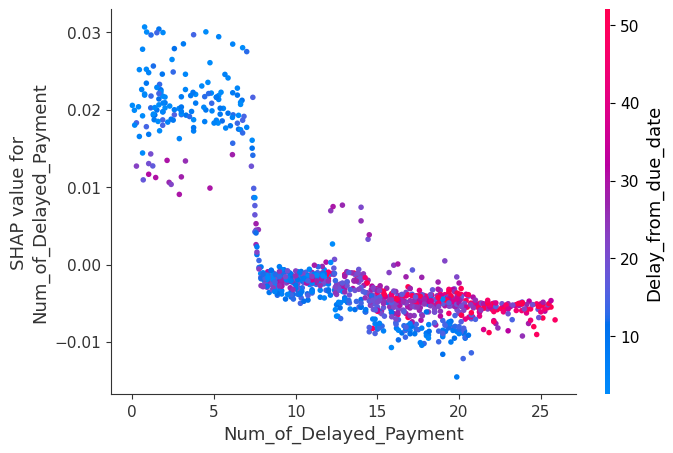

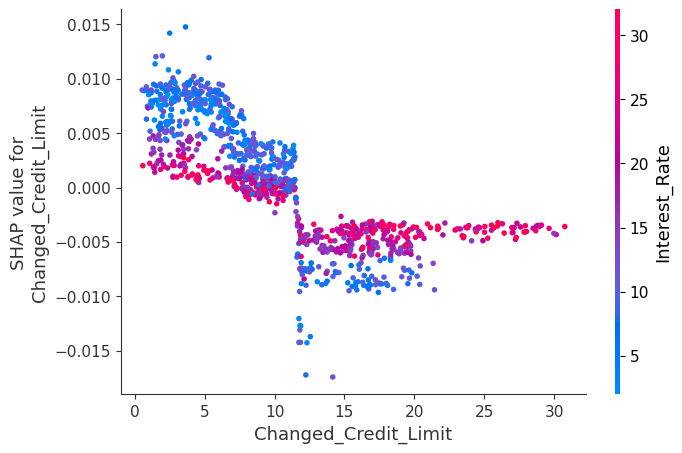

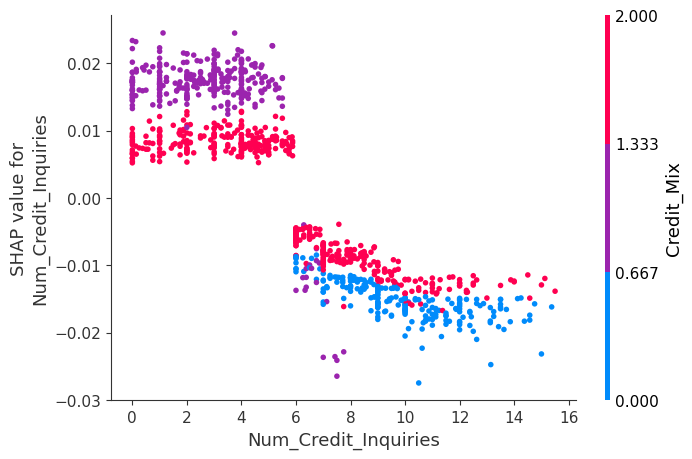

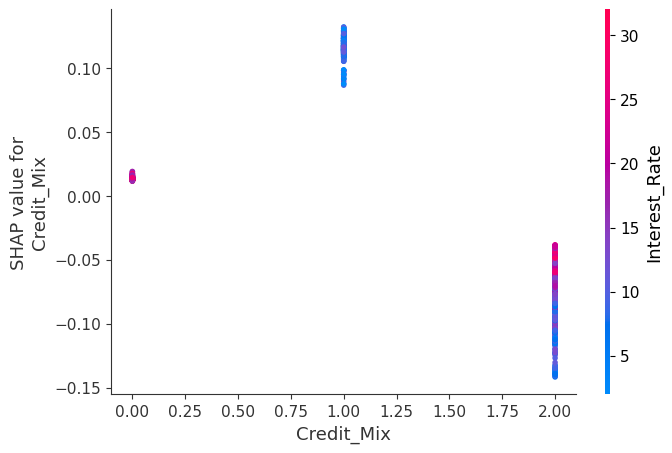

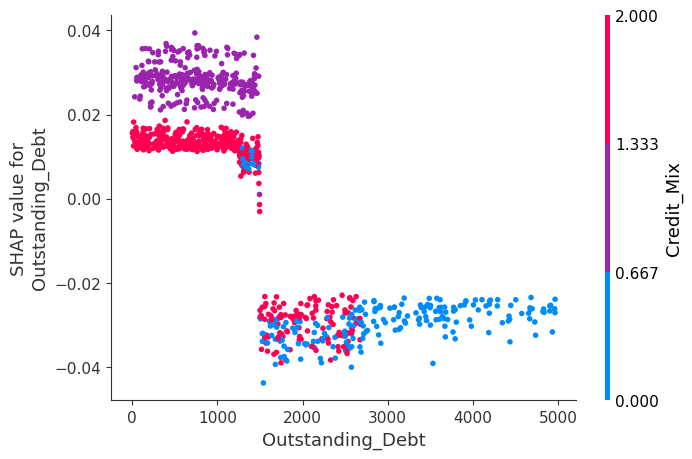

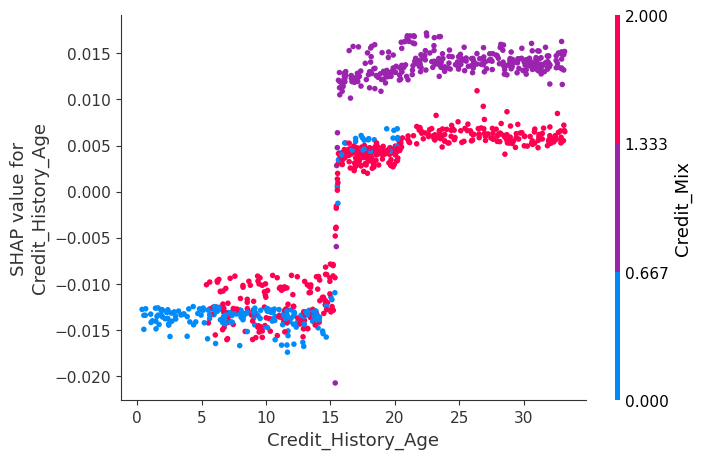

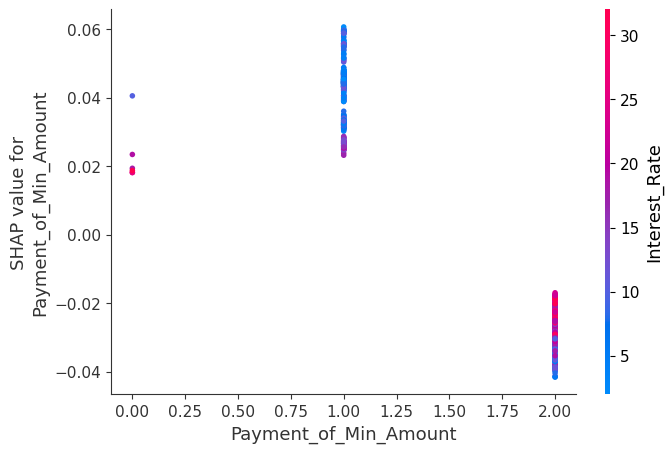

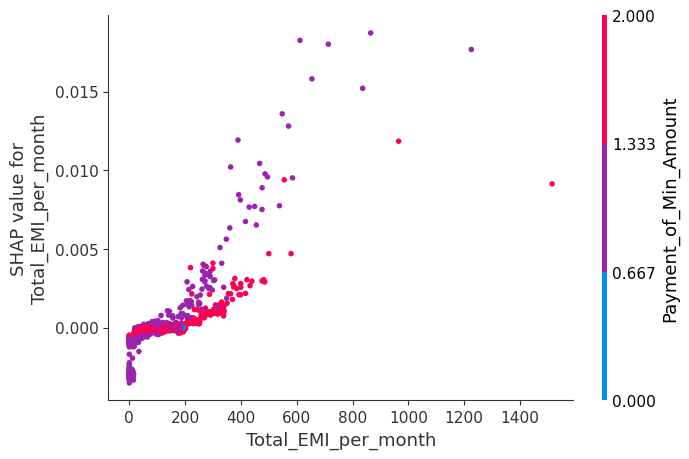

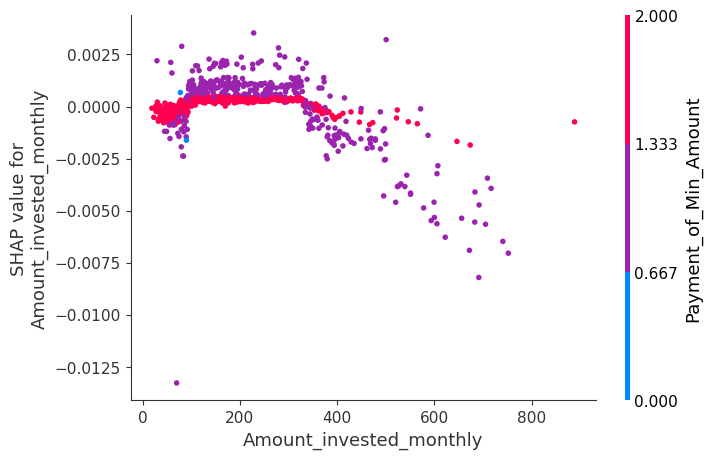

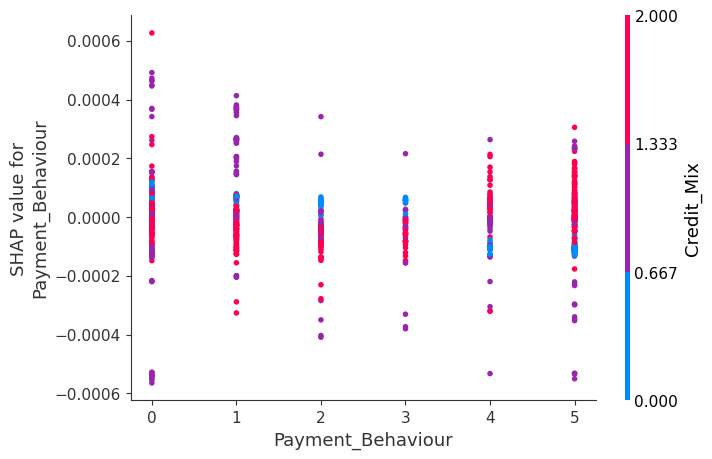

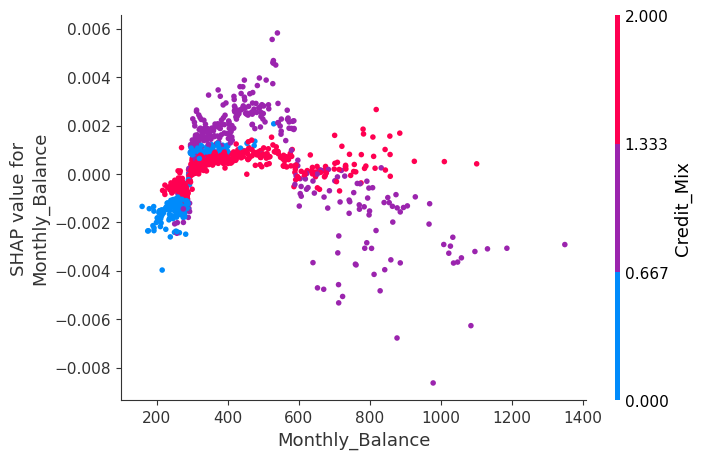

In [33]:
for name in X_display.columns:
    shap.dependence_plot(name, shap_values[2], X_display, display_features=X_display)